In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
generos_buenos = pd.read_csv('../data/generos_buenos.csv')
generos_malos = pd.read_csv('../data/generos_malos.csv')
generos = pd.read_csv('../data/generos_sin_mezclas.csv')

En este notebook ajustaremos nuestros modelos para conseguir los algoritmos finales que usaríamos en la realidad para hacer nuestras predicciones

#### GÉNEROS BIEN PREDICHOS

In [41]:
X_buenos = generos_buenos.drop(columns={'genero'})
Y_buenos = generos_buenos['genero']

X_train_buenos, X_test_buenos, Y_train_buenos, Y_test_buenos = train_test_split(X_buenos, Y_buenos, test_size=0.2, random_state=42)

In [42]:
params = {'booster' : 'gbtree', 
          'eta' : 0.1, 
          'max_depth' : 8, 
          'objective' : 'multi:softprob', 
          'num_class' : 3, 
          'eval_metric' : 'mlogloss',
          'n_estimators' : 100}

xgb_final_buenos = xgboost.XGBRFClassifier(**params)

In [43]:
xgb_final_buenos.fit(X_train_buenos, Y_train_buenos)

XGBRFClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.1,
                eval_metric='mlogloss', feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
                num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
print('Accuracy en train: ', accuracy_score(Y_train_buenos, xgb_final_buenos.predict(X_train_buenos)))
print('Accuracy en test: ', accuracy_score(Y_test_buenos, xgb_final_buenos.predict(X_test_buenos)))

Accuracy en train:  0.9166778478465047
Accuracy en test:  0.8503218884120172


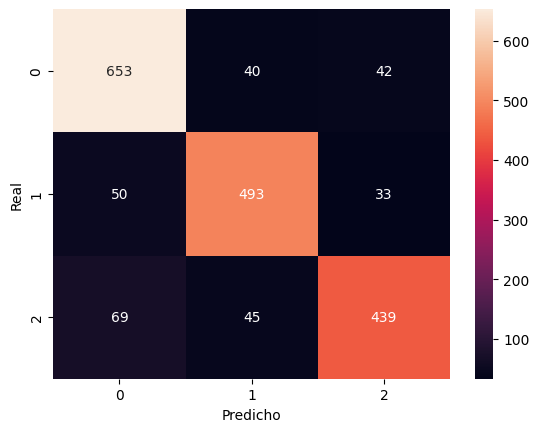

In [45]:
sns.heatmap(confusion_matrix(Y_test_buenos, xgb_final_buenos.predict(X_test_buenos)), annot= True, fmt = 'g')
plt.xlabel('Predicho')
plt.ylabel('Real');

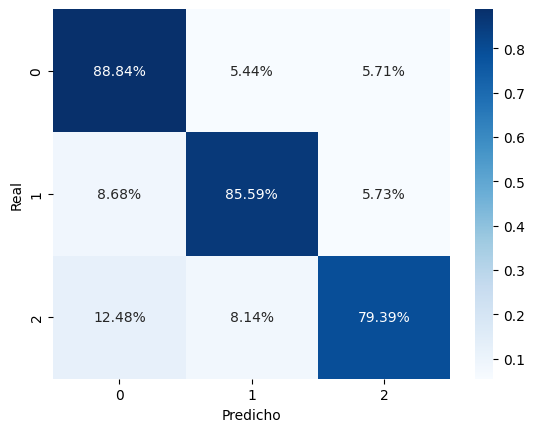

In [46]:
sns.heatmap(confusion_matrix(Y_test_buenos, xgb_final_buenos.predict(X_test_buenos), normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');
plt.xlabel('Predicho')
plt.ylabel('Real');

#### GÉNEROS MAL PREDICHOS

In [11]:
X_malos = generos_malos.drop(columns={'genero'})
Y_malos = generos_malos['genero']

X_train_malos, X_test_malos, Y_train_malos, Y_test_malos = train_test_split(X_malos, Y_malos, test_size=0.2, random_state=42)

In [12]:
params = {'booster' : 'gbtree', 
          'eta' : 0.2, 
          'max_depth' : 8, 
          'objective' : 'multi:softprob', 
          'num_class' : 3, 
          'eval_metric' : 'mlogloss',
          'n_estimators' : 500}

xgb_final_malos = xgboost.XGBRFClassifier(**params)

In [13]:
xgb_final_malos.fit(X_train_malos, Y_train_malos)

XGBRFClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.2,
                eval_metric='mlogloss', feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3,
                num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
print('Accuracy en train: ', accuracy_score(Y_train_malos, xgb_final_malos.predict(X_train_malos)))
print('Accuracy en test: ', accuracy_score(Y_test_malos, xgb_final_malos.predict(X_test_malos)))

Accuracy en train:  0.754437359986214
Accuracy en test:  0.6305995864920745


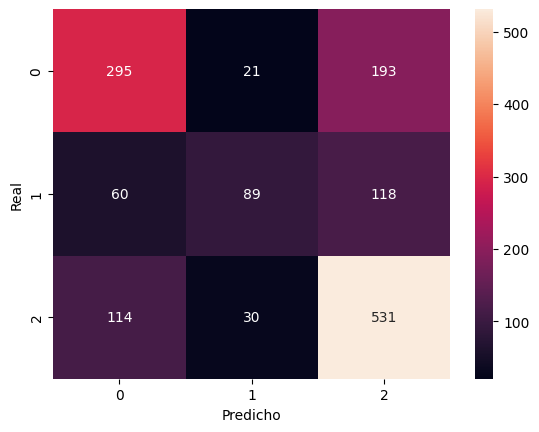

In [51]:
sns.heatmap(confusion_matrix(Y_test_malos, xgb_final_malos.predict(X_test_malos)), annot= True, fmt = 'g')
plt.xlabel('Predicho')
plt.ylabel('Real');

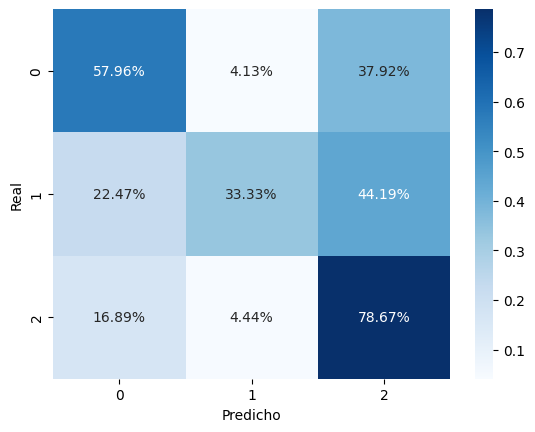

In [52]:
sns.heatmap(confusion_matrix(Y_test_malos, xgb_final_malos.predict(X_test_malos), normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');
plt.xlabel('Predicho')
plt.ylabel('Real');

Después de hacer muchas pruebas ajustando los parámetros de los modelos, vamos a quedarnos con esos dos modelos finales

----

#### FILTRO PRELIMINAR

Ahora que tenemos nuestros dos modelos que clasifican entre pop, latin y R&B, y entre rap, rock y EDM, necesitamos hacer un filtro preliminar a nuestro dataset completo que decida a qué modelo tiene que entrar cada canción para predecir su género.

In [53]:
generos.head()

,bailable,energia,volumen,hablado,acustico,instrumental,directo,valencia,popularidad,clave,modo,tempo,genero
0,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,60,7,1,121.956,0
1,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,69,1,1,123.976,0
2,0.449,0.856,-4.788,0.0623,0.1870,0.000000,0.1760,0.152,62,5,0,112.648,0
3,0.679,0.923,-6.500,0.1810,0.1460,0.000005,0.1240,0.752,58,6,1,121.984,0
4,0.744,0.726,-4.675,0.0463,0.0399,0.000000,0.3740,0.687,67,1,1,121.985,0


Asignamos el valor 0 a una nueva columna si el género está entre los mal predichos y 1 si está entre los bien predichos

In [54]:
generos_clasi = generos.copy()

In [55]:
generos_clasi

,bailable,energia,volumen,hablado,acustico,instrumental,directo,valencia,popularidad,clave,modo,tempo,genero
0,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,60,7,1,121.956,0
1,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,69,1,1,123.976,0
2,0.449,0.856,-4.788,0.0623,0.187000,0.000000,0.1760,0.1520,62,5,0,112.648,0
3,0.679,0.923,-6.500,0.1810,0.146000,0.000005,0.1240,0.7520,58,6,1,121.984,0
4,0.744,0.726,-4.675,0.0463,0.039900,0.000000,0.3740,0.6870,67,1,1,121.985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16566,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,42,2,1,128.170,5
16567,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,20,0,1,128.041,5
16568,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,14,6,0,127.989,5
16569,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,15,2,1,128.008,5


In [56]:
def asignar_valor(genero):
    if genero in [0, 3, 4]:
        return 0
    else:
        return 1

In [57]:
generos_clasi['clasificacion'] = generos_clasi['genero'].apply(asignar_valor)

In [58]:
generos_clasi['genero'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [59]:
generos_clasi['clasificacion'].unique()

array([0, 1], dtype=int64)

Ahora tenemos que diseñar un modelo que distinga si la canción pertenece al grupo de clasifiación 0 o 1.

Para entrenar este modelo tendremos que usar un dataframe que contenga como target nuestra nueva columna. Las features del modelo serán todas las demás columnas menos la de género, ya que cuando pongamos este modelo en producción, nuestro fin final será, precisamente, predecir esta variable, por lo que no tendría sentido entrenar este filtro preliminar usando esta característica también:

In [60]:
X_clasi = generos_clasi.drop(columns={'genero', 'clasificacion'})
Y_clasi = generos_clasi['clasificacion']

X_train_clasi, X_test_clasi, Y_train_clasi, Y_test_clasi = train_test_split(X_clasi, Y_clasi, test_size=0.2, random_state=42)

In [61]:
params = {'max_depth' : 7,
          'n_estimators' : 100,
          'max_features' : 10}

bosque_clasi = RandomForestClassifier(**params)

In [62]:
bosque_clasi.fit(X_train_clasi, Y_train_clasi)

RandomForestClassifier(max_depth=7, max_features=10)

In [63]:
print('Accuracy en train: ', accuracy_score(Y_train_clasi, bosque_clasi.predict(X_train_clasi)))
print('Accuracy en test: ', accuracy_score(Y_test_clasi, bosque_clasi.predict(X_test_clasi)))

Accuracy en train:  0.7435123717561859
Accuracy en test:  0.7046757164404224


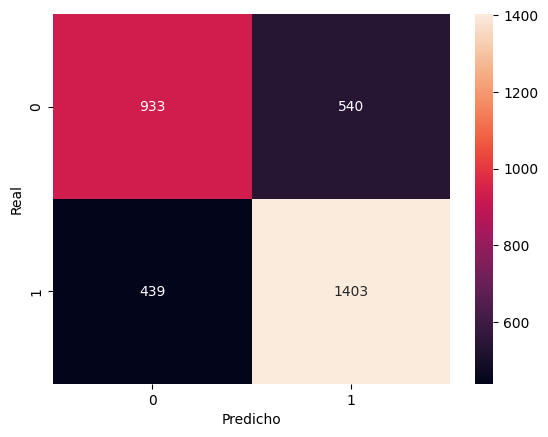

In [64]:
sns.heatmap(confusion_matrix(Y_test_clasi, bosque_clasi.predict(X_test_clasi)), annot= True, fmt = 'g')
plt.xlabel('Predicho')
plt.ylabel('Real');

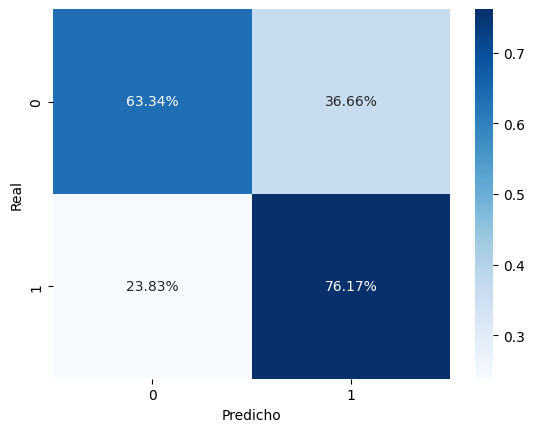

In [65]:
sns.heatmap(confusion_matrix(Y_test_clasi, bosque_clasi.predict(X_test_clasi), normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');
plt.xlabel('Predicho')
plt.ylabel('Real');

Después de varias pruebas, hemos llegado a la conclusión de que este modelo era el más adecuado en cuanto a precisión

----

### MODELOS FINALES

Entrenamiento de los 3 modelos:

In [16]:
generos = pd.read_csv('../data/generos_sin_mezclas.csv')
generos_final = generos.copy()

def asignar_valor(genero):
    if genero in [0, 3, 4]:
        return 0
    else:
        return 1

generos_final['clasificacion'] = generos_final['genero'].apply(asignar_valor)

X_clasi = generos_final.drop(columns={'genero', 'clasificacion'})
Y_clasi = generos_final['clasificacion']

X_train_clasi, X_test_clasi, Y_train_clasi, Y_test_clasi = train_test_split(X_clasi, Y_clasi, test_size=0.2, random_state=42)

params = {'max_depth' : 7,
          'n_estimators' : 100,
          'max_features' : 10}

final_clasi = RandomForestClassifier(**params)

final_clasi.fit(X_train_clasi, Y_train_clasi)

RandomForestClassifier(max_depth=7, max_features=10)

In [14]:
generos_malos = pd.read_csv('../data/generos_malos.csv')

X_malos = generos_malos.drop(columns={'genero'})
Y_malos = generos_malos['genero']

X_train_malos, X_test_malos, Y_train_malos, Y_test_malos = train_test_split(X_malos, Y_malos, test_size=0.2, random_state=42)

params = {'booster' : 'gbtree', 
          'eta' : 0.2, 
          'max_depth' : 8, 
          'objective' : 'multi:softprob', 
          'num_class' : 3, 
          'eval_metric' : 'mlogloss',
          'n_estimators' : 500}

final_malos = xgboost.XGBRFClassifier(**params)

final_malos.fit(X_train_malos, Y_train_malos)

XGBRFClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.2,
                eval_metric='mlogloss', feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3,
                num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
generos_buenos = pd.read_csv('../data/generos_buenos.csv')

X_buenos = generos_buenos.drop(columns={'genero'})
Y_buenos = generos_buenos['genero']

X_train_buenos, X_test_buenos, Y_train_buenos, Y_test_buenos = train_test_split(X_buenos, Y_buenos, test_size=0.2, random_state=42)

params = {'booster' : 'gbtree', 
          'eta' : 0.1, 
          'max_depth' : 8, 
          'objective' : 'multi:softprob', 
          'num_class' : 3, 
          'eval_metric' : 'mlogloss',
          'n_estimators' : 100}

final_buenos = xgboost.XGBRFClassifier(**params)

final_buenos.fit(X_train_buenos, Y_train_buenos)

XGBRFClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.1,
                eval_metric='mlogloss', feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
                num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
import pickle

# modelo de filtrado preliminar
pickle.dump(final_clasi, open('../modelos/final_clasi.pkl', 'wb'))

# modelo géneros malos
pickle.dump(final_malos, open('../modelos/final_malos.pkl', 'wb'))

# modelo géneros buenos
pickle.dump(final_buenos, open('../modelos/final_buenos.pkl', 'wb'))

In [4]:
df = generos.drop(columns={'genero'})

In [5]:
# df.to_csv('../data/df_sin_target.csv', index=False)